About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
!pip install category_encoders
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

C:\Users\rashm\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
company = pd.read_csv("Company_Data.csv")

In [3]:
company.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.shape

(400, 11)

In [5]:
company.info

<bound method DataFrame.info of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Ed

In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
company1 = encoder.fit_transform(company)

In [9]:
company_val = []
for value in company["Sales"]:
     if value<=7.49:
        company_val.append("low")
     else:
        company_val.append("high")

company1["company_val"]= company_val

In [10]:
company1.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
5,10.81,124,113,13,501,72,1,78,16,2,1,high
6,6.63,115,105,0,45,108,3,71,15,1,2,low
7,11.85,136,81,15,425,120,2,67,10,1,1,high
8,6.54,132,110,0,108,124,3,76,10,2,2,low
9,4.69,132,113,0,131,124,3,76,17,2,1,low


In [11]:
x = company1.drop(['company_val','Sales'], axis =1)
y = company1['company_val']

In [12]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: company_val, Length: 400, dtype: object

In [13]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [14]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 67.5
Train data Accuracy is: 78.4375


In [16]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [17]:
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test)*100)
#Predicting on train data
pred_train2 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train)*100)

Test data Accuracy is: 68.75
Train data Accuracy is: 90.9375


In [18]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [19]:
#Predicting on test data
pred_test3 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test))
#Predicting on train data
pred_train3 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train))

Test data Accuracy is: 0.7
Train data Accuracy is: 0.91875


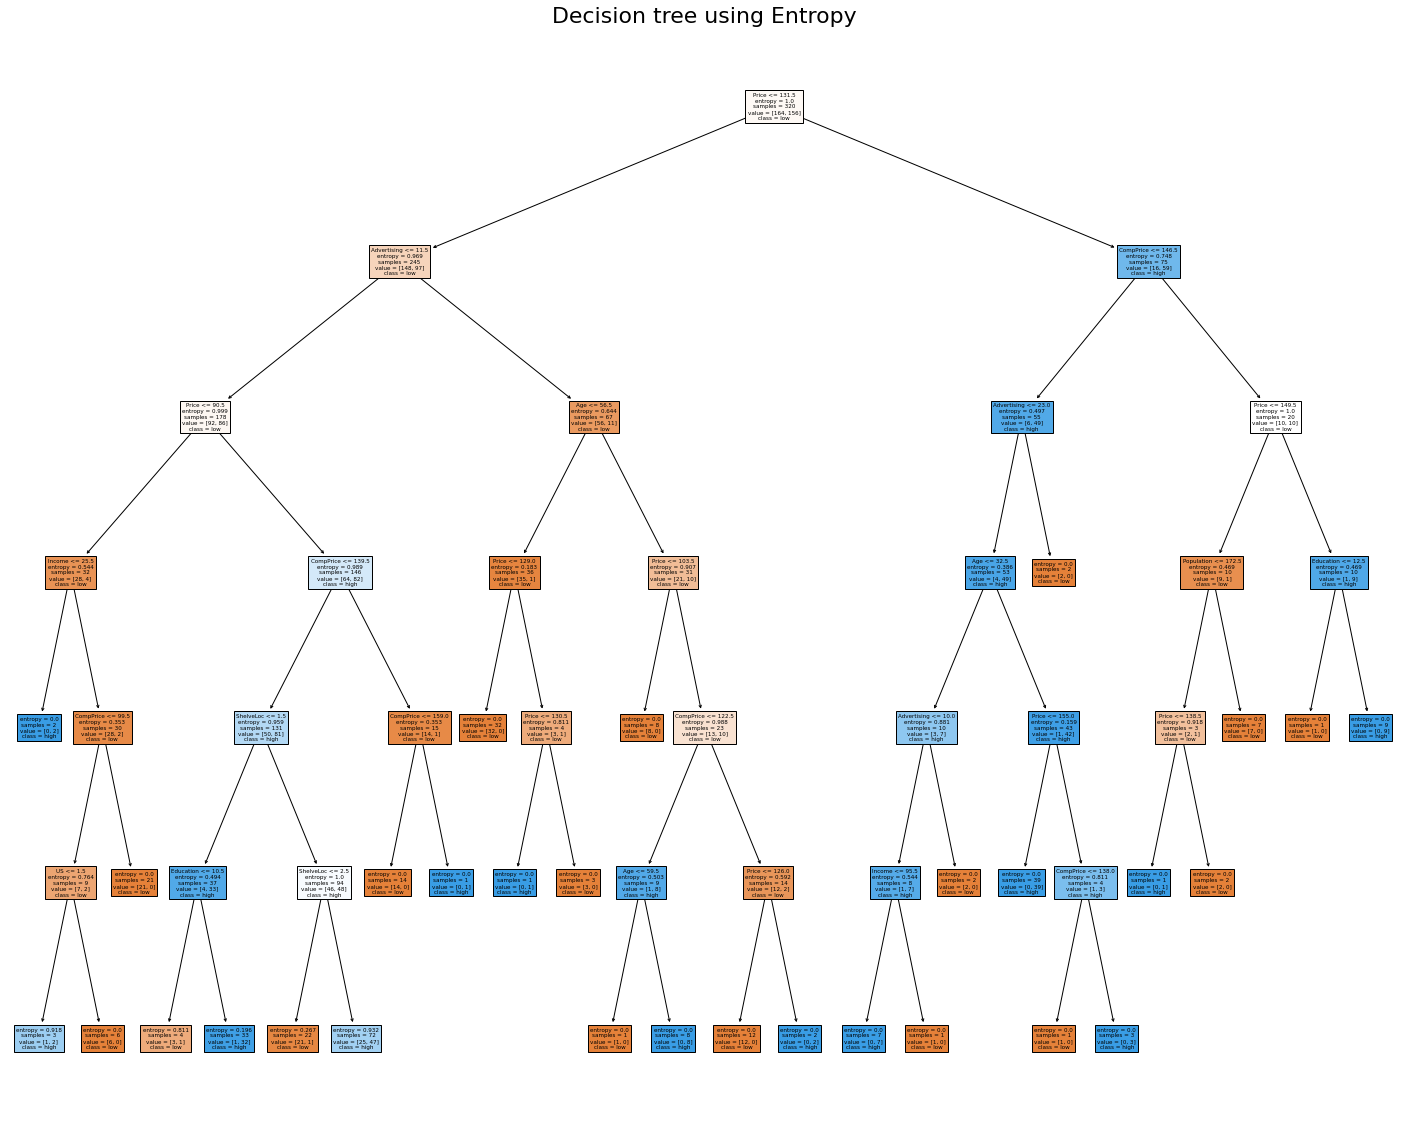

In [20]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model2,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.pdf')

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test)*100)
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train)*100)

Test data Accuracy is: 75.0
Train data Accuracy is: 88.75


In [23]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=6)
model_gini2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [24]:
#Predicting on test data
pred_testg2 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg2==y_test)*100)
#Predicting on train data
pred_traing2 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing2==y_train)*100)

Test data Accuracy is: 72.5
Train data Accuracy is: 92.5


In [25]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)
model_gini3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [26]:
#Predicting on test data
pred_testg3 = model_gini3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg3==y_test)*100)
#Predicting on train data
pred_traing3 = model_gini3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing3==y_train)*100)

Test data Accuracy is: 68.75
Train data Accuracy is: 97.1875


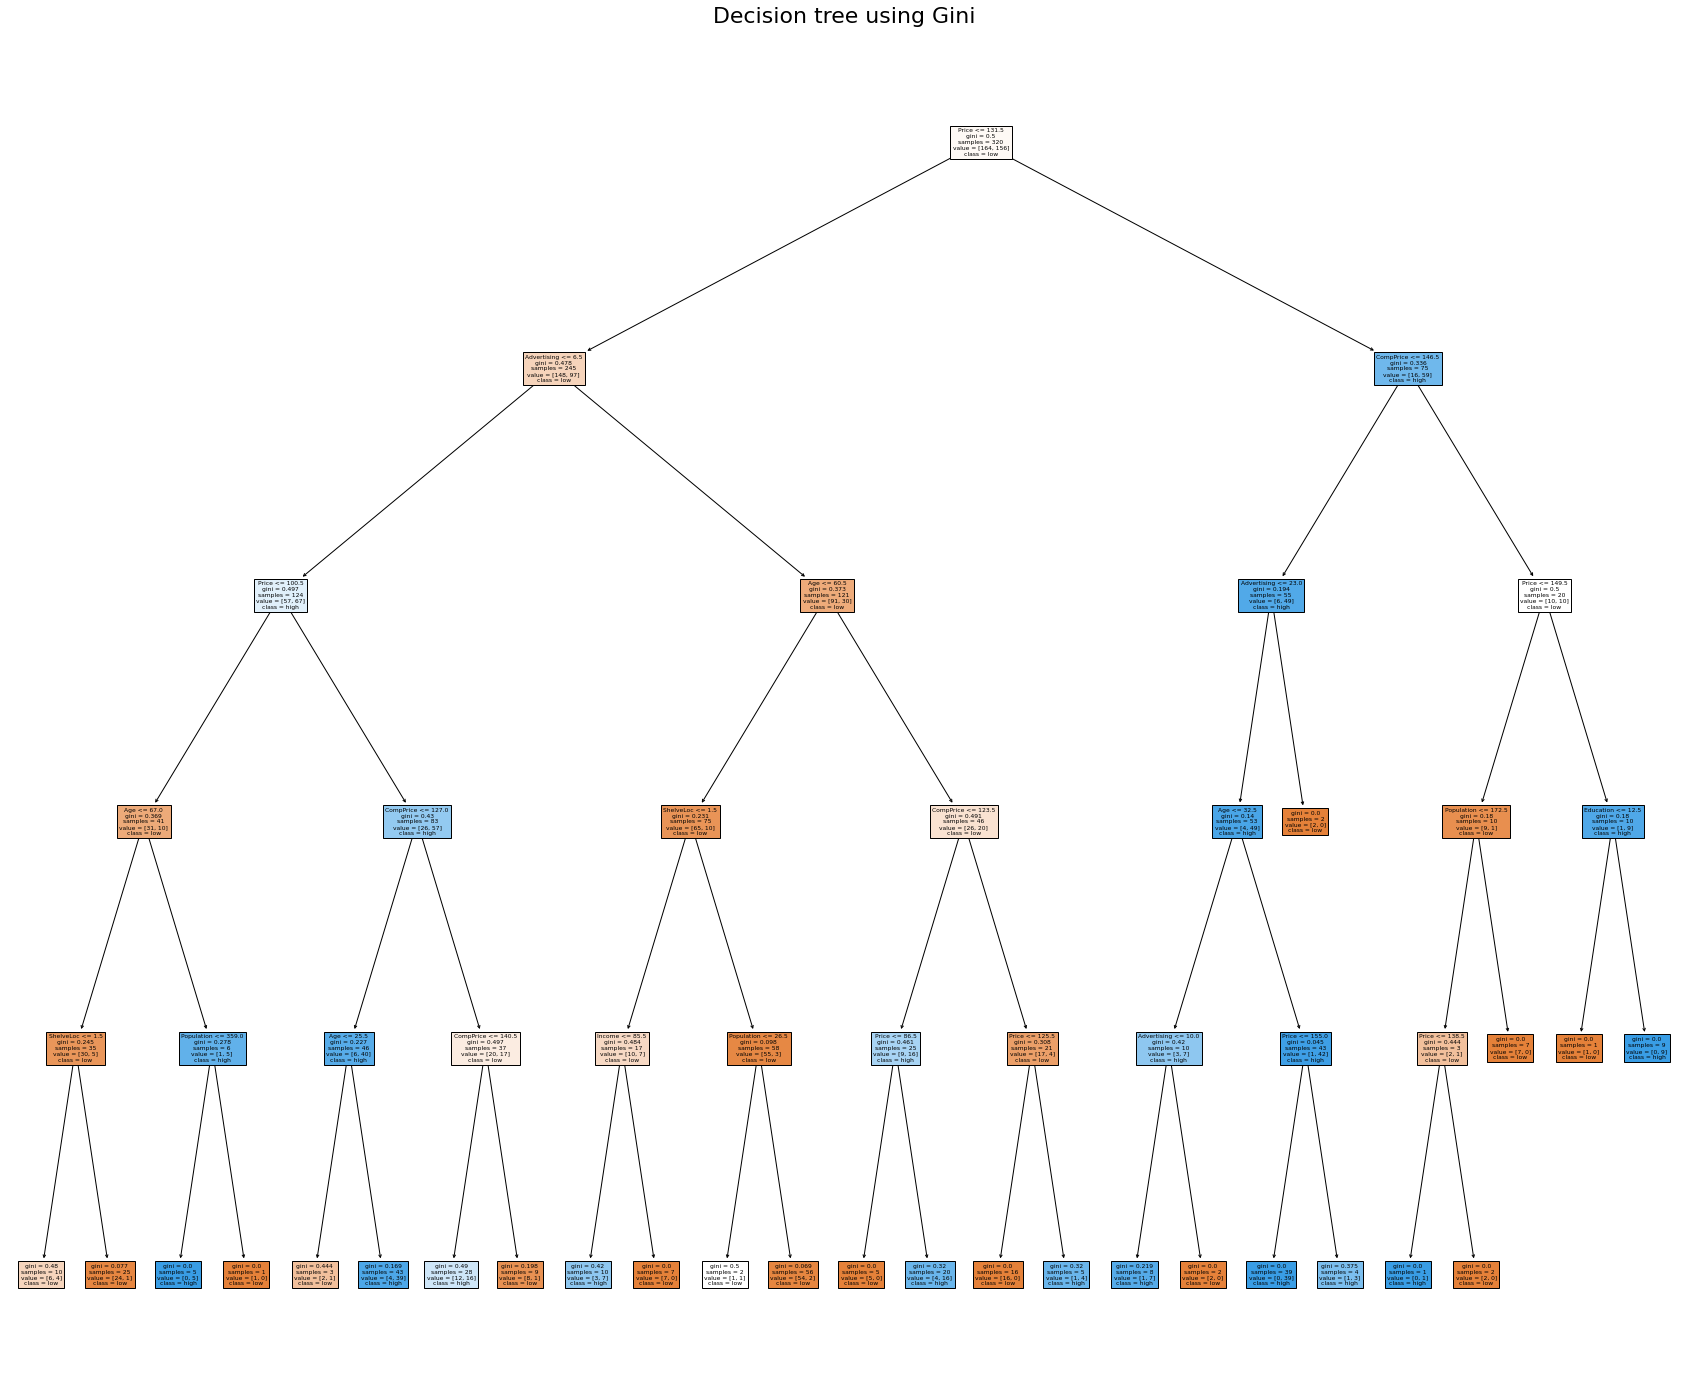

In [27]:
# let's plot the decision tree
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini1,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)
plt.savefig('DT_Gini.pdf')

In [28]:
preds = model_gini3.predict(x_test)
pd.Series(preds).value_counts()

low     40
high    40
dtype: int64

In [29]:
preds

array(['low', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'low', 'low', 'low', 'low', 'high', 'high', 'low',
       'low', 'high', 'high', 'high', 'high', 'low', 'low', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'high', 'high', 'high', 'high', 'high', 'low',
       'low', 'low', 'low', 'low', 'high', 'low', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'low', 'low', 'high', 'high', 'low',
       'low', 'low', 'high'], dtype=object)

In [30]:
pd.crosstab(y_test,preds)

col_0,high,low
company_val,,
high,25,10
low,15,30


In [31]:
np.mean(preds==y_test)*100

68.75

Classification Report                precision    recall  f1-score   support

        high       0.62      0.71      0.67        35
         low       0.75      0.67      0.71        45

    accuracy                           0.69        80
   macro avg       0.69      0.69      0.69        80
weighted avg       0.70      0.69      0.69        80



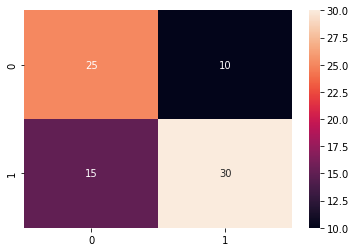

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, preds),annot=True,fmt = "d")
print('Classification Report ',classification_report(y_test,preds))